<a href="https://colab.research.google.com/github/kim-kidong/hello-world/blob/master/1004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
num_points = 100
vectors_set = []

for i in range(num_points):
  x1 = np.random.normal(0.0, 0.5)
  y1 = x1*0.1 + 0.3 + np.random.normal(0.0, 0.03)
  vectors_set.append([x1, y1])
  
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

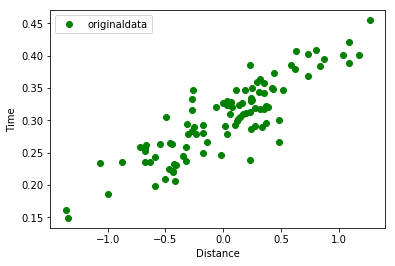

In [151]:
plt.plot(x_data, y_data, 'go', label = 'originaldata')
plt.xlabel('Distance')
plt.ylabel('Time')
plt.legend()
plt.show()

In [0]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = x_data * W + b
loss = tf.reduce_mean(tf.square(y-y_data))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.5) # Gradient Descent 알고리즘을 불러온다
train = optimizer.minimize(loss) #loss를 최소화하는 방식으로 optimizer를 설정해준다
init = tf.global_variables_initializer() #변수를 초기화해준다
sess = tf.Session()
sess.run(init)

In [90]:
for step in range(15):
    sess.run(train)
    print (step, sess.run(W), sess.run(b))

0 [0.35512486] [0.29224464]
1 [0.28496116] [0.2944901]
2 [0.23405403] [0.29631516]
3 [0.19711335] [0.2976393]
4 [0.17030741] [0.2986002]
5 [0.15085573] [0.29929745]
6 [0.13674065] [0.29980344]
7 [0.12649807] [0.30017057]
8 [0.11906556] [0.300437]
9 [0.11367217] [0.30063033]
10 [0.10975847] [0.3007706]
11 [0.10691851] [0.30087242]
12 [0.10485768] [0.3009463]
13 [0.10336225] [0.3009999]
14 [0.1022771] [0.3010388]


No handles with labels found to put in legend.


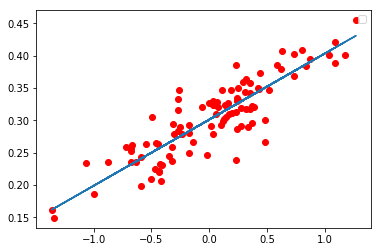

No handles with labels found to put in legend.


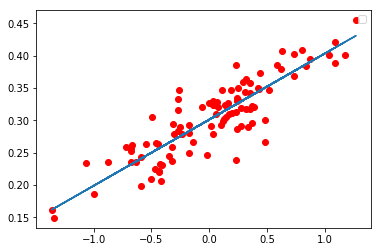

No handles with labels found to put in legend.


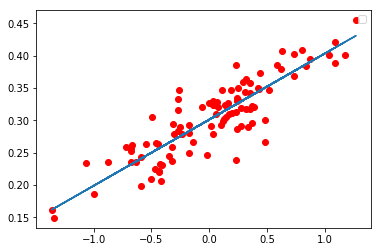

No handles with labels found to put in legend.


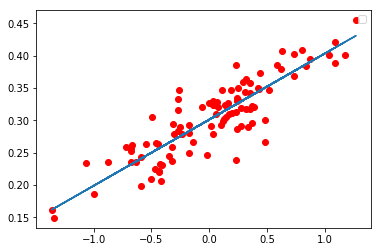

No handles with labels found to put in legend.


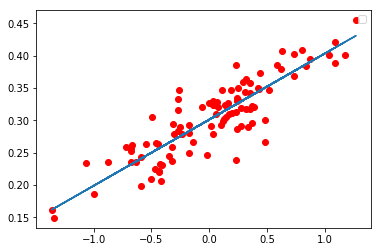

No handles with labels found to put in legend.


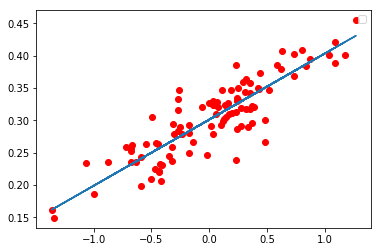

No handles with labels found to put in legend.


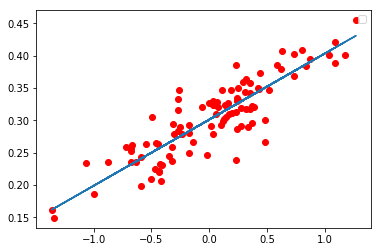

No handles with labels found to put in legend.


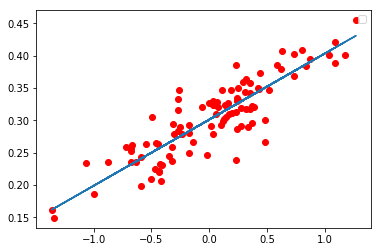

No handles with labels found to put in legend.


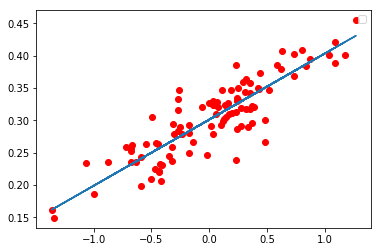

No handles with labels found to put in legend.


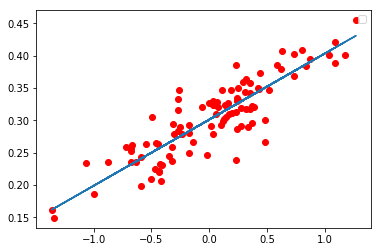

No handles with labels found to put in legend.


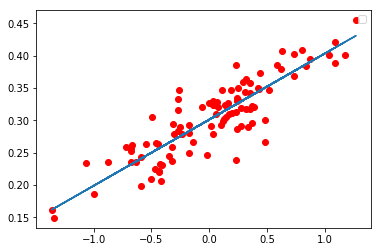

No handles with labels found to put in legend.


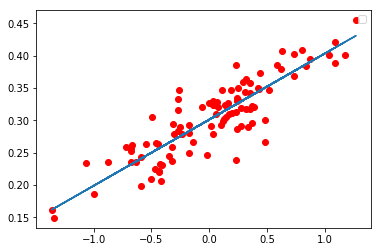

No handles with labels found to put in legend.


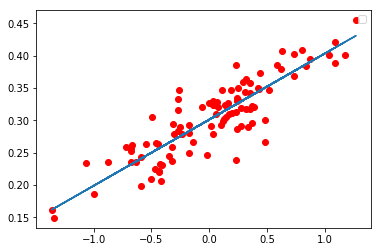

No handles with labels found to put in legend.


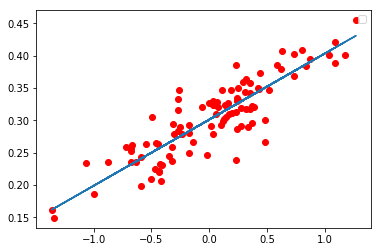

No handles with labels found to put in legend.


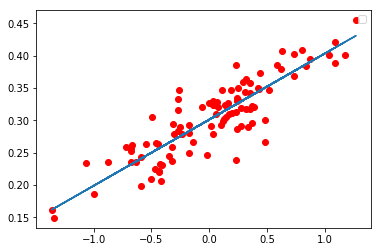

In [91]:
for step in range(15):
  plt.plot(x_data, y_data, 'ro')
  plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
  plt.legend()
  plt.show()

# 회귀분석 훈련

## (1) Python package 로드 및 matplotlib 출력 옵션 설정

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

##(2) 데이터생성

In [119]:
data = {'x1':[13,18,17,20,22,21], 'x2':[9,7,17,11,8,10], 'y':[20,22,30,27,35,32]}
data = pd.DataFrame(data)
x = data[['x1', 'x2']]
y = data['y']; data

,x1,x2,y
0,13,9,20
1,18,7,22
2,17,17,30
3,20,11,27
4,22,8,35
5,21,10,32


ValueError: ignored

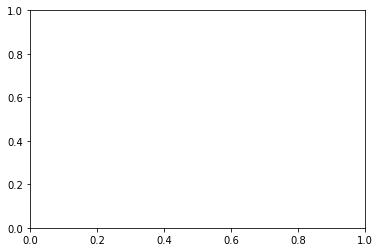

In [155]:
plt.plot(x1,y,'go')
# plt.scatter(x1,y, c='b', label='input1')

# plt.scatter(X,Y_Out,s=5,label='actual')
# plt.scatter(X,pred_Out,s=5,label='prediction with outliers')
# plt.scatter(X,pred,s=5,c='k', label='prediction without outlier')
# plt.legend()
# plt.title('Linear Regression')

## (3) 데이터학습

In [135]:
Li = LinearRegression()
Li.fit(x,y)
prediction = Li.predict(x)
print('w value = ', Li.coef_)
print('b value = ', Li.intercept_)


w value =  [1.5443459  0.62472284]
b value =  -7.359201773835938


## (4) 적합도 검증

In [136]:
residuals = y-prediction
residuals.describe()

count    6.000000e+00
mean     2.368476e-15
std      2.622371e+00
min     -3.399667e+00
25%     -1.987805e+00
50%      5.828714e-01
75%      1.415327e+00
max      3.385809e+00
Name: y, dtype: float64

In [137]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.796944017668523


## (5) 성능평가

In [138]:
print('score = ', Li.score(X =x, y=y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.796944017668523
Mean_Squared_Error =  5.730691056910575
RMSE =  2.3938861829482567
